In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load scaled features and labels
X_train = pd.read_csv('Features/TrainingSet/features_weather.csv')
y_train = pd.read_csv('Features/TrainingSet/matches_engineered_weather.csv')['FTR']  # Home (H), Draw (D), Away (A)
X_val = pd.read_csv('Features/ValidationSet/features_weather.csv')
y_val = pd.read_csv('Features/ValidationSet/matches_engineered_weather.csv')['FTR']

In [16]:
# Initialize with sensible defaults
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Train
rf.fit(X_train, y_train)

# Validate
val_pred = rf.predict(X_val)
print(f"Validation Accuracy: {accuracy_score(y_val, val_pred):.3f}")
print(classification_report(y_val, val_pred, target_names=['Away', 'Draw', 'Home']))

Validation Accuracy: 0.492
              precision    recall  f1-score   support

        Away       0.47      0.19      0.27       111
        Draw       0.00      0.00      0.00        96
        Home       0.50      0.96      0.65       173

    accuracy                           0.49       380
   macro avg       0.32      0.38      0.31       380
weighted avg       0.36      0.49      0.38       380



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(f"Best Params: {grid_search.best_params_}")

Best Params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [18]:
# Test set evaluation
X_test = pd.read_csv('Tuning/TestSet/features_weather.csv')
y_test = pd.read_csv('Tuning/TestSet/matches_engineered_weather.csv')['FTR']

test_pred = best_rf.predict(X_test)
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, test_pred):.3f}")
print(classification_report(y_test, test_pred))


Test Set Performance:
Accuracy: 0.455
              precision    recall  f1-score   support

           A       0.46      0.17      0.25       106
           D       0.00      0.00      0.00       110
           H       0.45      0.95      0.61       164

    accuracy                           0.46       380
   macro avg       0.31      0.37      0.29       380
weighted avg       0.32      0.46      0.33       380



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

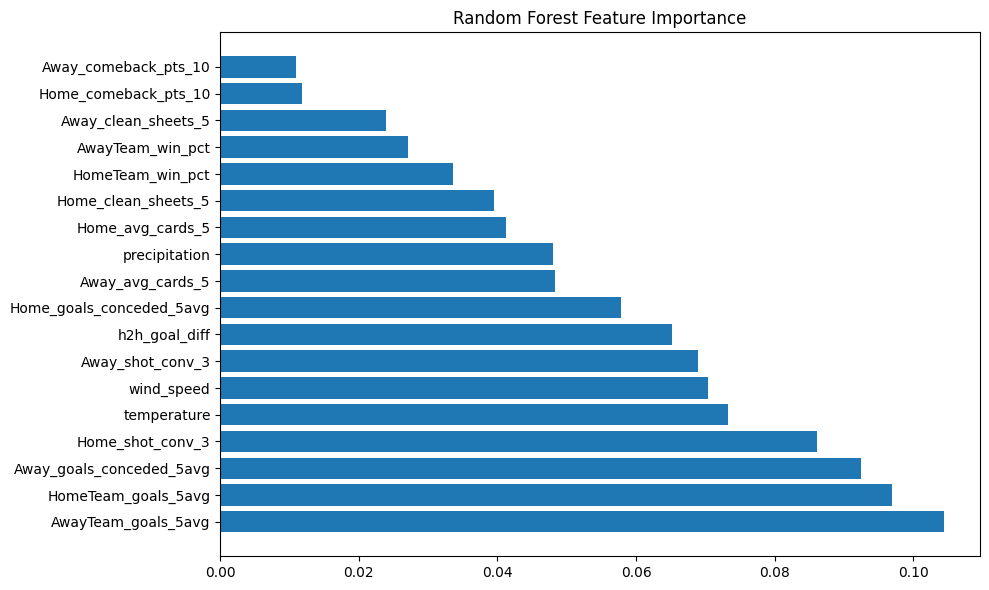

In [19]:
import matplotlib.pyplot as plt

# Get importances
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'])
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()